<a href="https://colab.research.google.com/github/NiallSheridan22/MachineLearning/blob/main/smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMOTE - Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [1]:
import pandas as pd # data processing, uploading csv and working with dataframe

#graph plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#splitting the dataset
from sklearn.model_selection import StratifiedKFold

#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore");

In [2]:
creditCard = pd.read_csv("./creditcard.csv")
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
creditCard.shape

(7973, 31)

In [4]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,7973.0,4257.151261,3198.964299,0.000000,1531.000000,3635.000000,6662.000000,10981.000000
V1,7973.0,-0.299740,1.498341,-23.066842,-1.046362,-0.416341,1.122758,1.685314
V2,7973.0,0.295226,1.283914,-25.640527,-0.237359,0.335446,0.950582,8.261750
V3,7973.0,0.899355,1.090297,-12.389545,0.372435,0.948695,1.597949,4.101716
V4,7973.0,0.215736,1.447057,-4.657545,-0.687521,0.223379,1.131542,7.380245
V5,7973.0,-0.025285,1.167218,-32.092129,-0.630525,-0.107337,0.405082,11.974269
V6,7973.0,0.157286,1.325015,-7.574798,-0.655399,-0.148669,0.555200,21.393069
V7,7973.0,-0.026445,1.063709,-12.968670,-0.517733,0.004732,0.527353,34.303177
V8,7973.0,-0.070525,1.332568,-23.632502,-0.199794,0.016128,0.307111,3.877662
V9,7973.0,0.655244,1.156618,-3.878658,-0.085635,0.613170,1.294087,10.392889


In [5]:
# checking for null values
creditCard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
creditCard = creditCard.dropna() ##CreditCard 
##DataFrame has missing values, I can remove the rows containing missing values 
##using dropna method of Pandas DataFrame. 


In [7]:
creditCard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0.0    7947
1.0      25
Name: Class, dtype: int64

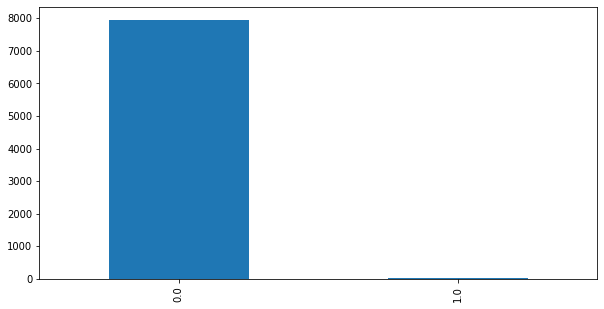

In [8]:
creditCard['Class'].value_counts().plot(kind='bar',figsize=[10,5])
creditCard['Class'].value_counts()


In [9]:
print('No FraudS', round(creditCard['Class'].value_counts()[0]/len(creditCard) * 100 , 2), '% of the dataset')
print('Frauds', round(creditCard['Class'].value_counts()[1]/len(creditCard) * 100 , 2), '% of the dataset')

No FraudS 99.69 % of the dataset
Frauds 0.31 % of the dataset


Visualise as a PieChart

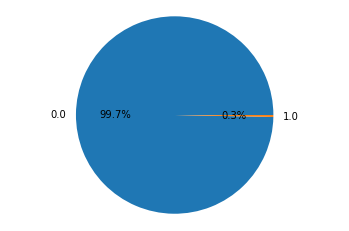

In [10]:
counts = creditCard['Class'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%.1f%%')
plt.axis('equal')
plt.show()

Under Sampling Approach 

In [11]:
#First Method of solving this problem which comes in mind will be by 
#taking same number of records of the majority class as the minority class

# Taking all the records i.e. 492 of fraud classes(minority class).
fraudlent = creditCard.loc[creditCard['Class'] == 1]

# Taking the same number of records of the majority class(No Frauds)
legit_df = creditCard.loc[creditCard['Class'] == 0][:492]

#concating the above dataframes to get a single dataframe
normal_distributed_df = pd.concat([fraudlent, legit_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [12]:
#Now we have exactly 50-50 percent rows of both majority and minority classes

print('No Frauds', round(new_df['Class'].value_counts()[0]/len(new_df) * 100 , 2), '% of the dataset')
print('Frauds', round(new_df['Class'].value_counts()[1]/len(new_df) * 100 , 2), '% of the dataset')

No Frauds 95.16 % of the dataset
Frauds 4.84 % of the dataset


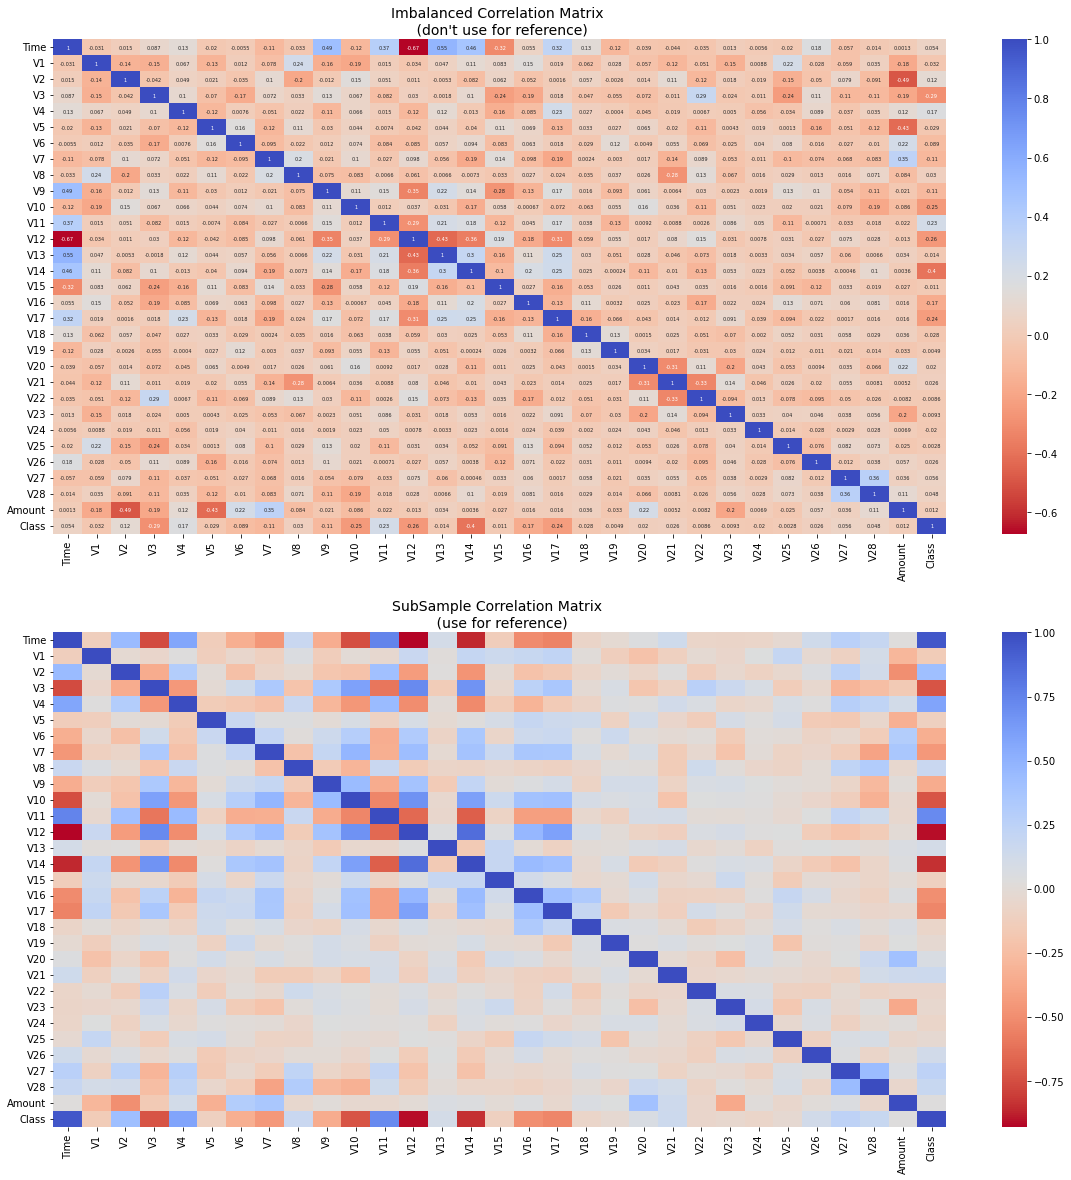

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))

# correlation using Original imbalanced dataframe
corr = creditCard.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot=True, annot_kws={'size':5}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# correlation using new balanced dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Explaining code above - The code above is creating a correlation matrix heatmap for two different dataframes. The first heatmap shows the correlation matrix for the original imbalanced dataset, while the second heatmap shows the correlation matrix for the balanced dataset created using under-sampling. The heatmap is a visualization of the correlation matrix, which is a matrix that shows how strongly each variable in the dataset is correlated with every other variable. The correlation coefficient ranges from -1 to 1, with 1 indicating a strong positive correlation, 0 indicating no correlation, and -1 indicating a strong negative correlation. The heatmap colors each cell of the matrix based on the correlation coefficient, with red indicating positive correlation, blue indicating negative correlation, and white indicating no correlation. This allows us to see which variables are strongly correlated and which are not, and can help with feature selection and model building.

In [14]:
#Now preparing the machine algorithms by seperating features and targets

In [15]:
# Preparing data for ML algo by seperating target and the features.
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled and balanced
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's implement simple classifiers
# creating a dictionary of ML objects
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# appying cross validation
from sklearn.model_selection import cross_val_score

#iterating thru each of the algos in the "classifiers" dictionary
for key, classifier in classifiers.items():
    #Splitting the data into 5 parts using cv=5 parameter of cross_val_score method
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    
    #The above line of code will return 5 accuracy scores
    #printing the mean of the accuracy metrics
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a training score of", round(training_score.mean() * 100, 2) , "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.03 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.76 % accuracy score
Classifiers:  SVC Has a training score of 99.52 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.76 % accuracy score


Tuning Model Parameters
 below I will be using GridSearchCV to find the best parameter for our classifiers. The GridSearchCV iterates through each combination of parameters and returns best parameters for the model in the best estimator object

In [16]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# logistic regression best parameters.
log_reg = grid_log_reg.best_estimator_
#--------------------------

# KNeighborsClassifier
knears_params = {"n_neighbors": list(range(2,5,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

#--------------------------

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

#--------------------------

# DecisionTree Classifier
tree_params = {"max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Classifers with their tuned parameters we got via GridSearchCV")
print(log_reg)
print(knears_neighbors)
print(svc)
print(tree_clf)

Classifers with their tuned parameters we got via GridSearchCV
LogisticRegression(C=0.001)
KNeighborsClassifier(n_neighbors=2)
SVC(C=0.5, kernel='poly')
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [17]:
#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 99.52%
Knears Neighbors Cross Validation Score: 99.76%
Support Vector Classifier Cross Validation Score: 99.52%
DecisionTreeClassifier Cross Validation Score: 99.76%


Applying tuned parameters has slightly increased the accuracy score of our models.



Synthetic Minority Oversampling Technique (SMOTE)


In [18]:
import numpy as np

# here we are using the imbalanced dataset 
X = creditCard.drop('Class', axis=1)
y = creditCard['Class']
# drop rows with NaN values
data = creditCard.dropna()

# check for infinite values
# print(np.isfinite(data).all())

# print(creditCard.isnull().sum())

# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():
    
    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]
    
    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)
    
    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)
    
    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")


Classifiers: LogisiticRegression Has a training score of, 89.66 % accuracy score
Classifiers: Knears Neighbors Has a training score of, 56.31 % accuracy score
Classifiers: Support Vector Classifier Has a training score of, 79.81 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 98.98 % accuracy score
